### Importing Modules 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [16]:
import pickle
import scipy.io as sio
from basicFunctions.filters import \
                        butter_bandpass_filter,butter_highpass_filter,butter_lowpass_filter
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages

darkMode = True

if darkMode:
        plt.style.use('dark_background')

In [38]:
from mainFunctions.normalizedBetween_0_and_1\
                    import normalizedBetween_0_and_1

In [1]:
%load_ext autoreload
%autoreload 2

### names of the recording sessions

In [301]:
sessionName = ['CW_191110_072941','CW_200213_093607','CW_191207_164403',\
               'CW_200229_103710','CW_200206_093345','CW_200229_155255',\
               'CW_191113_073032','CW_200206_093029','CW_200213_153602',\
               'CW_200227_093534','CW_200227_095545','CW_200227_124846',\
               'CW_200227_124434','CW_200227_153027','CW_200227_152609']

animalType = ['Hz','Hz','Hz',\
              'Ht','Ht','Ht',\
              'Ct','Ct','Ct',\
              'Pv-Hz','Pv-Hz','Pv-Hz',\
              'SST-Hz','SST-Hz','SST-Hz']

fsSession = [20e3,20e3,]
fsSession[0]

### reading the results of sessions

In [314]:
allWaveShapes = []
allSpikeWidth = []
allSpontFRs = []
allClustersChannel = []

baseFolderAddress = "Y:\Ehsan-temp\Claire-Ehsan_Share\DataToMerge//"
saveFigFolderAddress = "Y:\Ehsan-temp\Claire-Ehsan_Share\DataToMerge\\figs//"

for sessionLoopCounter in range(len(sessionName)):
    
    dataAddress = baseFolderAddress + sessionName[sessionLoopCounter] + '.pkl'
    
#     print(sessionName[sessionLoopCounter])
    
    pkl_file = open(dataAddress, 'rb')
    SavedData = pickle.load(pkl_file)
    pkl_file.close()
    
    allWaveShapes.append(SavedData[0])
    allSpikeWidth.append(SavedData[1])
    allSpontFRs.append(SavedData[2])
    allClustersChannel.append(SavedData[3])
    

[[32.71804634799166,
  3.2392595875820027,
  7.179795345342389,
  3.7695251226885307,
  24.668615525074564],
 [0.27363805778008554,
  1.5472988358110291,
  3.0547957723085912,
  2.3159730163023604,
  22.15556141159426,
  1.8532759367833065,
  3.9718978689897266,
  0.7695033867270284,
  22.50797406176558,
  3.1111817963360027,
  4.573072389870218,
  40.22728211237967,
  0.5729815088667852,
  5.004259632432777,
  0.2495910769448659,
  8.359228062063764,
  0.1832545780890876,
  7.903164632430289,
  1.7089940517719888,
  1.1567426987976344,
  1.4867667806051315,
  4.277045763726306],
 [6.697286687557068,
  4.68417744769216,
  8.036090152802183,
  1.3714970785600147,
  0.47405739306603606,
  0.05230978130383846,
  12.542904748261016,
  6.804358271163363],
 [0.025367927099870794,
  0.5010165602224482,
  10.866985771407151,
  0.2623994959392885,
  1.471339771792506,
  20.797736483284698,
  2.7801662606014648,
  0.5612653870846414,
  7.0435635088235005,
  15.654389263785893,
  4.21266139402229

In [310]:
savingAdd = 'Y://Ehsan-temp//Claire-Ehsan_Share//DataToMerge//'
animalName = 'CW_200227_093534'
pkl_file = open(savingAdd+animalName+'.pkl', 'rb')
SavedData = pickle.load(pkl_file)
pkl_file.close()

In [312]:
len(SavedData[2])

17

### distribution of all spike width

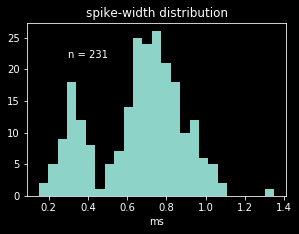

In [270]:
mergedSpikeWidth = np.concatenate(allSpikeWidth)

figWidthDist = plt.figure(figsize=(6,4))
axWidthDist = figWidthDist.add_axes([0.2,0.2,0.6,0.6])
axWidthDist.hist(mergedSpikeWidth,bins=25);
axWidthDist.set_xlabel('ms')
axWidthDist.set_title('spike-width distribution')
axWidthDist.text(0.3,axWidthDist.get_ylim()[1]*0.8,'n = %(number)d'%{'number':len(mergedSpikeWidth)});

fileNameToSave = 'spikeWidthDistribution.pdf'
figWidthDist.savefig( saveFigFolderAddress+ fileNameToSave, \
                      dpi=200, transparent=False)

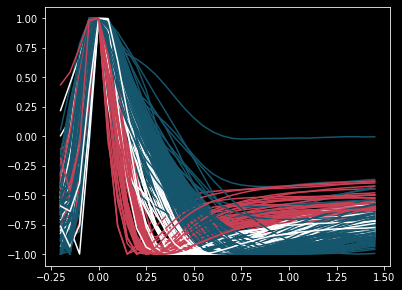

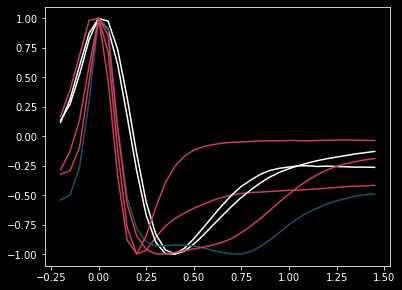

In [250]:
narrowSpikingCutLevel = 0.4
wideSpikingCutLevel = 0.6

narrowSpikingColor = '#CA4156'
wideSpikingColor = '#15566D'

fs = 20e3

normSpikeWindowBeforeTime = 0.2 #in ms
normSpikeWindowAfterTime = 1.5 #in ms

repolarizationTime = 0.6 #in ms
repolarizationSample = int(repolarizationTime*fs/1e3)

negativeSpikesRepolarizationValues = []
negativeSpikesWidth = []
# allColors = []

normSpikeWindowBeforeSample = int(normSpikeWindowBeforeTime*fs/1e3) #in ms
normSpikeWindowAfterSample = int(normSpikeWindowAfterTime*fs/1e3) #in ms

mergedSpikeWaveShapes = np.concatenate(allWaveShapes)

figAllSpikesWaveShapes = plt.figure(figsize=(8,6))
axAllSpikesWaveShapes = figAllSpikesWaveShapes.add_axes([0.2,0.2,0.6,0.6])

figPositiveSpikesWaveShapes = plt.figure(figsize=(8,6))
axPositiveSpikesWaveShapes = figPositiveSpikesWaveShapes.add_axes([0.2,0.2,0.6,0.6])

for neuronLoopCounter in range(len(mergedSpikeWidth)):
    
    
    # if negative spike
    if abs(min(mergedSpikeWaveShapes[neuronLoopCounter])) >\
                    abs(max(mergedSpikeWaveShapes[neuronLoopCounter])):
    
        normalizedWaveShape =  1 - normalizedBetween_0_and_1(mergedSpikeWaveShapes[neuronLoopCounter])*2
        
    else: #Positive Spike
        normalizedWaveShape =  normalizedBetween_0_and_1(mergedSpikeWaveShapes[neuronLoopCounter])*2 - 1

    spikePeakSample = np.argmax(normalizedWaveShape)
    repolarizationValue = normalizedWaveShape[spikePeakSample+repolarizationSample]
    
    plotAlphaVal = 1
    if mergedSpikeWidth[neuronLoopCounter] < narrowSpikingCutLevel:
        waveShapeColor = narrowSpikingColor
    elif mergedSpikeWidth[neuronLoopCounter] > wideSpikingCutLevel:
        waveShapeColor = wideSpikingColor
    else:
        waveShapeColor = 'w'
        plotAlphaVal = 1
        
#     plt.figure()
    if abs(min(mergedSpikeWaveShapes[neuronLoopCounter])) >\
                    abs(max(mergedSpikeWaveShapes[neuronLoopCounter])):
        axAllSpikesWaveShapes.plot(np.arange(-normSpikeWindowBeforeTime,normSpikeWindowAfterTime,1e3/fs),\
                           normalizedWaveShape[spikePeakSample-normSpikeWindowBeforeSample:\
                                    spikePeakSample+normSpikeWindowAfterSample],c=waveShapeColor,
                                  alpha = plotAlphaVal)
        
        negativeSpikesRepolarizationValues.append(repolarizationValue)
        negativeSpikesWidth.append(mergedSpikeWidth[neuronLoopCounter])
        
    else:
        axPositiveSpikesWaveShapes.plot(np.arange(-normSpikeWindowBeforeTime,normSpikeWindowAfterTime,1e3/fs),\
                                   normalizedWaveShape[spikePeakSample-normSpikeWindowBeforeSample:\
                                            spikePeakSample+normSpikeWindowAfterSample],c=waveShapeColor)

    
#     print(repolarizationValue)

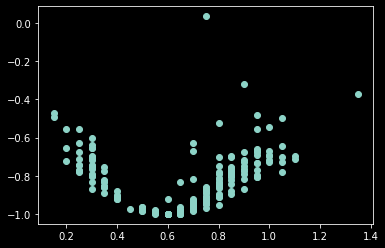

In [76]:
plt.plot(negativeSpikesWidth,negativeSpikesRepolarizationValues,'o')

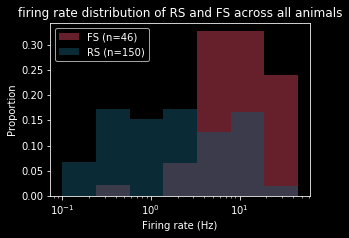

In [275]:
narrowSpikingCutLevel = 0.4
wideSpikingCutLevel = 0.6
# binWidth = 1

narrowSpikingFRs = np.concatenate(allSpontFRs)[np.where(mergedSpikeWidth < narrowSpikingCutLevel)]
wideSpikingFRs = np.concatenate(allSpontFRs)[np.where(mergedSpikeWidth > wideSpikingCutLevel)]

minFR = 0.1
maxFR = max(max(narrowSpikingFRs),max(wideSpikingFRs))
bins = 8

narrowSpikingCellNo = len(np.where(mergedSpikeWidth < narrowSpikingCutLevel)[0])
wideSpikingCellNo = len(np.where(mergedSpikeWidth > wideSpikingCutLevel)[0])

figFRdist = plt.figure(figsize=(6,4))
axFRdist = figFRdist.add_axes([0.2,0.2,0.6,0.6])

weights = np.ones_like(narrowSpikingFRs)/float(len(narrowSpikingFRs))
axFRdist.hist(narrowSpikingFRs,weights=weights\
         ,alpha=0.5,bins=np.logspace(np.log10(minFR),np.log10(maxFR), bins),color=narrowSpikingColor)



weights = np.ones_like(wideSpikingFRs)/float(len(wideSpikingFRs))
x, bins, p=plt.hist(wideSpikingFRs,weights=weights\
        ,alpha=0.5,bins=np.logspace(np.log10(minFR),np.log10(maxFR), bins),color=wideSpikingColor);


axFRdist.legend(['FS (n=%(FS_cellNumber)d)'%{'FS_cellNumber':narrowSpikingCellNo},\
            'RS (n=%(RS_cellNumber)d)'%{'RS_cellNumber':wideSpikingCellNo}],loc='upper left')

axFRdist.set_xscale('log')
axFRdist.set_title('firing rate distribution of RS and FS across all animals');
axFRdist.set_xlabel('Firing rate (Hz)')
axFRdist.set_ylabel('Proportion')


fileNameToSave = 'FR_distribution_AllCells.pdf'
figFRdist.savefig( saveFigFolderAddress+ fileNameToSave, \
                      dpi=200, transparent=False)

In [166]:
uniqueAnimalTypes

array(['Ct', 'Ht', 'Hz', 'Pv-Hz', 'SST-Hz'], dtype='<U6')

In [278]:
len(allnarrowSpikesFR)

5

Text(0.5, 1.0, 'FS firing rate distribution compare')

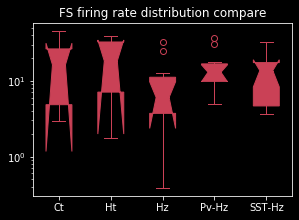

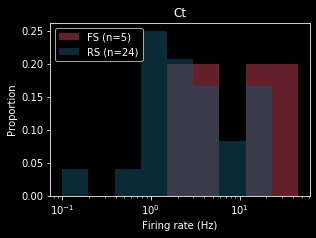

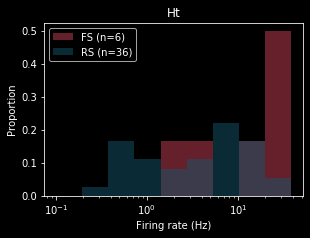

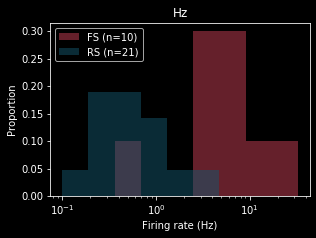

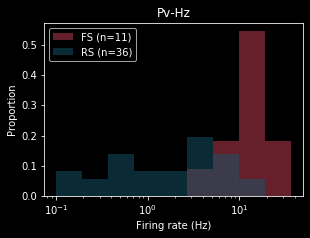

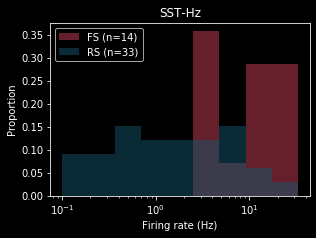

In [277]:
uniqueAnimalTypes = np.unique(animalType)
allnarrowSpikesFR = []
allwideSpikesFR = []
for animalTypeLoopID in uniqueAnimalTypes:
    
    animalTypeIndices = np.where(np.array(animalType)==animalTypeLoopID)[0]
    
    animalTypeSpontFR = np.concatenate(list(allSpontFRs[itemPos] for itemPos in animalTypeIndices))
    
    animalTypeSpikeWidth = np.concatenate(list(allSpikeWidth[itemPos] for itemPos in animalTypeIndices))
        
    narrowSpikingFRs = animalTypeSpontFR[np.where(animalTypeSpikeWidth < narrowSpikingCutLevel)]
    wideSpikingFRs = animalTypeSpontFR[np.where(animalTypeSpikeWidth > wideSpikingCutLevel)]
    
    allnarrowSpikesFR.append(narrowSpikingFRs)
    allwideSpikesFR.append(wideSpikingFRs)

    minFR = 0.1
    maxFR = max(max(narrowSpikingFRs),max(wideSpikingFRs))
    bins = 10
    
    narrowSpikingCellNo = len(np.where(animalTypeSpikeWidth < narrowSpikingCutLevel)[0])
    wideSpikingCellNo = len(np.where(animalTypeSpikeWidth > wideSpikingCutLevel)[0])

    figFRdist = plt.figure(figsize=(6,4))
    axFRdist = figFRdist.add_axes([0.2,0.2,0.6,0.6])

    weights = np.ones_like(narrowSpikingFRs)/float(len(narrowSpikingFRs))
    axFRdist.hist(narrowSpikingFRs,weights=weights\
             ,alpha=0.5,bins=np.logspace(np.log10(minFR),np.log10(maxFR), bins),color=narrowSpikingColor)



    weights = np.ones_like(wideSpikingFRs)/float(len(wideSpikingFRs))
    x, bins, p=plt.hist(wideSpikingFRs,weights=weights\
            ,alpha=0.5,bins=np.logspace(np.log10(minFR),np.log10(maxFR), bins),color=wideSpikingColor);


    axFRdist.legend(['FS (n=%(FS_cellNumber)d)'%{'FS_cellNumber':narrowSpikingCellNo},\
                'RS (n=%(RS_cellNumber)d)'%{'RS_cellNumber':wideSpikingCellNo}],loc='upper left')

    axFRdist.set_xscale('log')
    plt.title(animalTypeLoopID)
    plt.xlabel('Firing rate (Hz)')
    plt.ylabel('Proportion')
    
    fileNameToSave = animalTypeLoopID + '_FR_distribution.pdf'
    figFRdist.savefig( saveFigFolderAddress+ fileNameToSave, \
                          dpi=200, transparent=False)
    

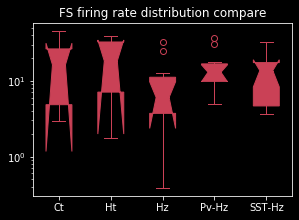

In [296]:
c=narrowSpikingColor
figNarrowSpikingFRCompare = plt.figure(figsize=(6,4))
axNarrowSpikingFRCompare = figNarrowSpikingFRCompare.add_axes([0.2,0.2,0.6,0.6])
axNarrowSpikingFRCompare.boxplot(allnarrowSpikesFR,notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            );
axNarrowSpikingFRCompare.set_xticklabels(uniqueAnimalTypes)
axNarrowSpikingFRCompare.set_yscale('log')
axNarrowSpikingFRCompare.set_title('FS firing rate distribution compare')

fileNameToSave = 'FS_FRdistributionCompare.pdf'
figNarrowSpikingFRCompare.savefig( saveFigFolderAddress+ fileNameToSave, \
                      dpi=200, transparent=False)

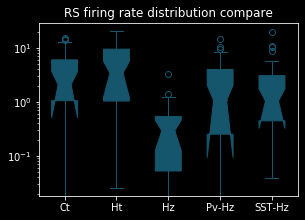

In [299]:
c=wideSpikingColor
figWideSpikingFRCompare = plt.figure(figsize=(6,4))
axWideSpikingFRCompare = figWideSpikingFRCompare.add_axes([0.2,0.2,0.6,0.6])
axWideSpikingFRCompare.boxplot(allwideSpikesFR,notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            );
axWideSpikingFRCompare.set_xticklabels(uniqueAnimalTypes)
axWideSpikingFRCompare.set_yscale('log')
axWideSpikingFRCompare.set_title('RS firing rate distribution compare')

fileNameToSave = 'RS_FRdistributionCompare.pdf'
figWideSpikingFRCompare.savefig( saveFigFolderAddress+ fileNameToSave, \
                      dpi=200, transparent=False)